In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

In [25]:
# Define the data dictionary
#data = {'Animal': ['L05', 'L07'],
        'Type': ['Not_add', 'Add'],
        'delta': [35.264, 67.67],
        'ntheta': [79.54, 109.78],
        'wtheta': [70.28, 200.45],
        'beta': [32.40, 200.78]}

In [2]:
data = '/Users/tatiana/Downloads/HPC.csv'

In [3]:
df = pd.read_csv(data, sep='\t').set_index('Animal')
df

,Type,delta,ntheta,wtheta,beta,lgamma,hgamma,fgamma,hfo
Animal,,,,,,,,,
L-05,Not_Addicted,1906.203574,1876.099139,1611.891242,752.936833,598.800303,380.971035,496.456890,601.733270
L-07,Not_Addicted,553.731179,554.920172,428.901470,190.120327,231.485040,163.181225,368.952966,427.320506
L-10,Addicted,4169.752157,4467.965212,3886.128450,1932.821442,1772.480618,1082.029360,1471.006664,1824.103516
L-11,Not_Addicted,2371.484396,2677.668357,2217.818100,1422.702843,1077.711871,807.127267,1195.249989,1234.539596
L-13,Not_Addicted,2930.487924,2165.321727,1763.078699,676.924584,422.141802,262.614602,403.555371,499.832142
L-21,Not_Addicted,1711.152448,2567.268933,1959.143202,1101.246901,1029.779425,698.839652,660.179421,843.901047
L-22,Not_Addicted,1906.713290,2232.857688,1724.190959,858.569491,666.862818,399.015631,252.093162,245.714879
L-34,Addicted,1664.136184,4308.067161,3317.436487,1141.957572,816.808442,458.384345,641.825008,854.075779
L-36,Addicted,1332.471330,1397.996417,1226.377625,861.358980,972.305336,469.713487,207.455882,175.817482


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


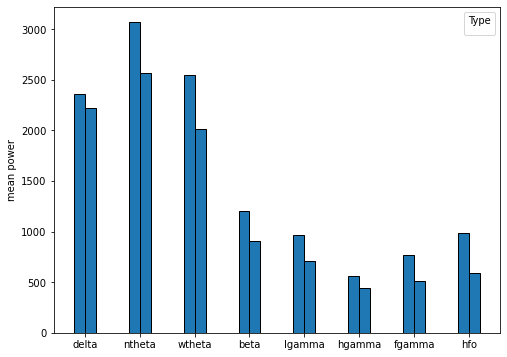

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
colors = {'Not_Addicted': 'tab:blue', 'Addicted': 'tab:orange'}
for i, col in enumerate(['delta', 'ntheta', 'wtheta', 'beta', 'lgamma', 'hgamma', 'fgamma', 'hfo']):
    ax.bar([i, i+0.2], df.groupby('Type')[col].mean(), color=[colors[c] for c in df['Type']], width=0.2, edgecolor='black')
    # add significance level
    p = ttest_ind(df[df['Type'] == 'Not_Addicted'][col], df[df['Type'] == 'Addicted'][col])[1]
    if p < 0.05:
        x1, x2 = i, i+0.2
        y, h, col = df[col].max() + 5, 2, 'black'
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
ax.set_xticks([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1])
ax.set_xticklabels(['delta', 'ntheta', 'wtheta', 'beta','lgamma', 'hgamma', 'fgamma', 'hfo'])
ax.set_ylabel('mean power')
ax.legend(title='Type')

In [5]:
from itertools import combinations
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

In [6]:
cites = ['Not_Addicted', 'Addicted']
pairs = list(combinations(cites, r=2))
pairs

[('Not_Addicted', 'Addicted')]

In [7]:
my_colors = {'Not_Addicted': 'g', 'Addicted': 'r'}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=8.074e-01 stat=-2.488e-01
delta - t-statistic: -0.25, p-value: 0.807
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=5.335e-01 stat=-6.397e-01
ntheta - t-statistic: -0.64, p-value: 0.533
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=3.799e-01 stat=-9.091e-01
wtheta - t-statistic: -0.91, p-value: 0.380
p-value annotation legend:
ns: 5

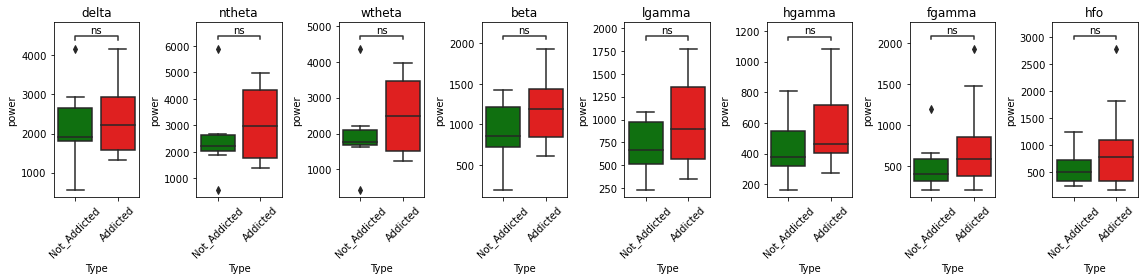

In [8]:
fig, ax = plt.subplots(1,8, figsize=(16,4))
for i, col in enumerate(['delta', 'ntheta', 'wtheta', 'beta', 'lgamma', 'hgamma', 'fgamma', 'hfo']):
    sns.boxplot(x='Type', y=col, data=df, ax=ax[i], palette=my_colors)
    ax[i].set_title(col)
    ax[i].set_xlabel('Type')
    ax[i].set_ylabel('power')

    test_result = add_stat_annotation(ax[i], data=df, x='Type', y=col, 
                                        box_pairs=pairs, test='t-test_ind', 
                                        text_format='star', loc = 'inside', 
                                        verbose=2)

    not_add = df[df['Type'] == 'Not_Addicted'][col]
    add = df[df['Type'] == 'Addicted'][col]
    t_statistic, p_value = ttest_ind(not_add, add)
    significance_level = 0.05
    if p_value < significance_level:
        print(f"{col} - t-statistic: {t_statistic:.2f}, p-value: {p_value:.3f} (significant)")
    else:
        print(f"{col} - t-statistic: {t_statistic:.2f}, p-value: {p_value:.3f}")
    
    plt.setp(ax[i].get_xticklabels(), rotation=45)
plt.tight_layout()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=8.074e-01 stat=-2.488e-01
delta - t-statistic: -0.25, p-value: 0.807
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=5.335e-01 stat=-6.397e-01
ntheta - t-statistic: -0.64, p-value: 0.533
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Not_Addicted v.s. Addicted: t-test independent samples with Bonferroni correction, P_val=3.799e-01 stat=-9.091e-01
wtheta - t-statistic: -0.91, p-value: 0.380
p-value annotation legend:
ns: 5

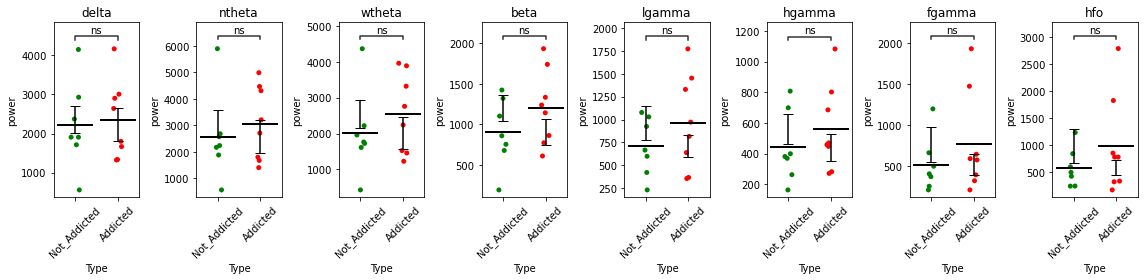

In [14]:
fig, ax = plt.subplots(1,8, figsize=(16,4))
for i, col in enumerate(['delta', 'ntheta', 'wtheta', 'beta', 'lgamma', 'hgamma', 'fgamma', 'hfo']):
    sns.stripplot(x='Type', y=col, data=df, ax=ax[i], palette=my_colors)
    sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x='Type',
            y=col,
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[i])
    
    means = df.groupby('Type')[col].mean()
    sems = df.groupby('Type')[col].sem()

# Plot the SEM error bars and mean text
    #for j, (mean, sem) in enumerate(zip(means, sems)):
        #ax[i].errorbar(j, mean, yerr=sem, color='k', capsize=5, capthick=1, zorder=10)

    
    ax[i].set_title(col)
    ax[i].set_xlabel('Type')
    ax[i].set_ylabel('power')


    test_result = add_stat_annotation(ax[i], data=df, x='Type', y=col, 
                                        box_pairs=pairs, test='t-test_ind', 
                                        text_format='star', loc = 'inside', 
                                        verbose=2)

    not_add = df[df['Type'] == 'Not_Addicted'][col]
    add = df[df['Type'] == 'Addicted'][col]
    t_statistic, p_value = ttest_ind(not_add, add)
    significance_level = 0.05
    if p_value < significance_level:
        print(f"{col} - t-statistic: {t_statistic:.2f}, p-value: {p_value:.3f} (significant)")
    else:
        print(f"{col} - t-statistic: {t_statistic:.2f}, p-value: {p_value:.3f}")
    
    plt.setp(ax[i].get_xticklabels(), rotation=45)
plt.tight_layout()